In [3]:

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install biopython
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install imblearn
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install pyod
!{sys.executable} -m pip install lightgbm
!{sys.executable} -m pip install catboost 
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install cufflinks
!{sys.executable} -m pip install pyclustering
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install algorithmia
!{sys.executable} -m pip install paramiko
!{sys.executable} -m pip install gensim

In [9]:
import nltk


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import pandas as pd
import re

import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve,plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import gc

from gensim.corpora import Dictionary
from gensim.models import LsiModel
gc.enable()


In [14]:
%%time 
posts=pd.read_csv('D:\so-data\PostsChosenV1.csv' , index_col='Id', )
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(posts)

          AcceptedAnswerId  AnswerCount  \
Id                                        
1468404            1549052            3   
1583856            1634592           14   
1914947            1915407            4   
1961341            1961838            1   
2039387            2044192            4   
...                    ...          ...   
66394506          66397036            1   
66394874          66394940            1   
66400722          66400807            1   
66402094          66403323            1   
66405059          66405291            2   

                                                       Body  \
Id                                                            
1468404   <p>Does mono touch allow you to do cross iPhon...   
1583856   <p>After sitting through a session today on Mo...   
1914947   <p>What is the best approach to implement tabs...   
1961341   <p>How can I check internet access with MonoTo...   
2039387   <p>I'm new to MonoTouch and iPhone development...   

<decorator-gen-55>:2: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.


In [13]:
#posts = posts.sample(10, replace=False).reset_index(drop=True)

In [67]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
#     textStr = textStr.replace('<html>','')
#     textStr = textStr.replace('</html>','')
#     textStr = textStr.replace('<body>','')
#     textStr = textStr.replace('</body>','')
#     textStr = textStr.replace('<p>','')
#     textStr = textStr.replace('</p>','')
#     textStr = textStr.replace('<pre>','')
#     textStr = textStr.replace('</pre>','')
    
    
#     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    #lower document
    tokens = word_tokenize(textStr.lower())
    
    # remove stop words
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`'])
    stopped_tokens = [token for token in tokens if token not in stop_words]
    
    # PorterStemmer is used to make the root word, like Paying to 'play'.
    ps = PorterStemmer()
    
    stemmer = []
    for s in stopped_tokens:
        if s.isalpha():
            stemmer.append(ps.stem(s))
#     stemmer = [s for s in stopped_tokens ps.stem(s)]
    
    lemmatizer = WordNetLemmatizer()
    
    lemmatized_tokens = [lemmatizer.lemmatize(i, pos="n") for i in stemmer]
    
    textStr = (" ").join(lemmatized_tokens)
    
    return textStr

In [127]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello kill play cricket


In [16]:
transformedPosts = []

for row in posts.itertuples(index=True, name='Pandas'):
    transformedPosts.append(transform_text(row.Body))

In [68]:
X = pd.Series(transformedPosts)

In [69]:
X.head(10)

0    mono touch allow cross iphon commun iphon room...
1    sit session today mono local event use monotou...
2    best approach implement tab look like web appl...
3    check internet access monotouch care internet ...
4    new monotouch iphon develop imag png resourc f...
5    realli program question plea bear relat ide us...
6    question duplic way safer alloc intptr draw us...
7    recent post john gruber note follow legales re...
8    possibl implement long press javascript jqueri...
9    ap serila data local offlin use ensur app alwa...
dtype: object

In [70]:
count_vectorizer = CountVectorizer(ngram_range=(2, 2))

transformed_vector = count_vectorizer.fit_transform(X)

In [71]:
transformed_vector.shape

(265020, 1789446)

In [72]:
feature_names = count_vectorizer.get_feature_names()

In [73]:
len(feature_names)

1789446

In [23]:
feature_names[1000:1005]

['abil programmat', 'abil prop', 'abil properli', 'abil provid', 'abil push']

In [74]:
NUM_TOPICS = 30

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20)

lda = lda_model.fit_transform(transformed_vector)

In [25]:
lda.shape

(265020, 30)

In [26]:
lda[:2]

array([[3.70370370e-03, 3.70370370e-03, 3.70370370e-03, 3.70370370e-03,
        3.70370370e-03, 3.70370370e-03, 3.70370370e-03, 3.70370370e-03,
        3.70370370e-03, 3.70370370e-03, 3.70370370e-03, 3.70370370e-03,
        3.70370370e-03, 3.70370370e-03, 3.70370370e-03, 3.70370370e-03,
        3.70370370e-03, 3.70370370e-03, 3.70370370e-03, 3.70370370e-03,
        3.70370370e-03, 3.70370370e-03, 3.70370370e-03, 3.70370370e-03,
        3.70370370e-03, 3.70370370e-03, 3.70370370e-03, 8.92592593e-01,
        3.70370370e-03, 3.70370370e-03],
       [7.75193799e-04, 7.75193799e-04, 7.75193799e-04, 7.75193799e-04,
        7.75193799e-04, 7.75193799e-04, 7.75193799e-04, 7.75193799e-04,
        7.75193799e-04, 9.77519380e-01, 7.75193799e-04, 7.75193799e-04,
        7.75193799e-04, 7.75193799e-04, 7.75193799e-04, 7.75193799e-04,
        7.75193799e-04, 7.75193799e-04, 7.75193799e-04, 7.75193799e-04,
        7.75193799e-04, 7.75193799e-04, 7.75193799e-04, 7.75193799e-04,
        7.75193799e-04,

In [34]:
type(lda)

numpy.ndarray

In [37]:
lda[0]

array([0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 ,
       0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 ,
       0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 ,
       0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 ,
       0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 , 0.0037037 ,
       0.0037037 , 0.0037037 , 0.89259259, 0.0037037 , 0.0037037 ])

In [1]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

In [141]:
lda_2d_tsne = tsne.fit_transform(lda)

In [142]:
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape

(265020, 2)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not Id
1468404     <p>Does mono touch allow you to do cross iPhon...
1583856     <p>After sitting through a session today on Mo...
1914947     <p>What is the best approach to implement tabs...
1961341     <p>How can I check internet access with MonoTo...
2039387     <p>I'm new to MonoTouch and iPhone development...
                                  ...                        
66394506    <p>I am trying to change the text of a <code>T...
66394874    <p>I'm working on a Flutter app which needs up...
66400722    <p>I have Node.js app, served by express, with...
66402094    <p>I have birthdays as timestamp stored in my ...
66405059    <p>I have two lists of integers in Dart that a...
Name: Body, Length: 265020, dtype: object

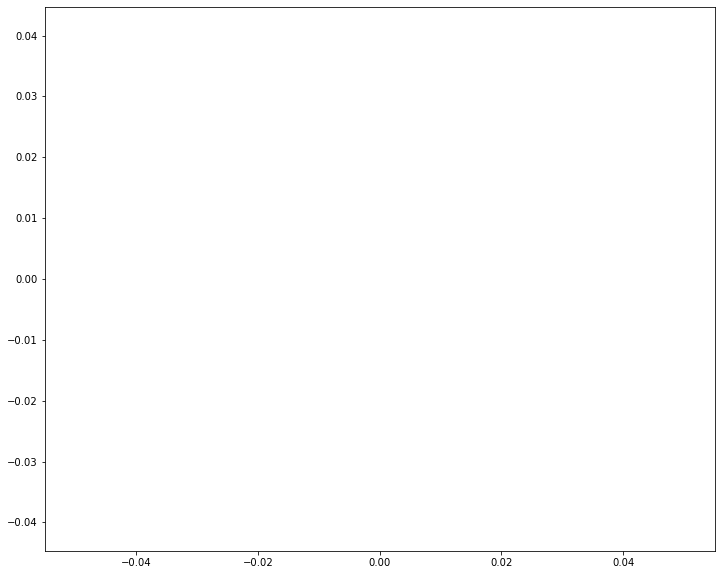

In [145]:
plt.subplots(figsize = (12, 10))
plt.axis('equal');

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c = posts['Body'], cmap = plt.cm.Spectral)

In [65]:
topic_list = []

def print_topic(identifier, top_words=15):
    for topic_id, topic_word_probs in enumerate(lda.components_):
        topics = ''
        if topic_id == identifier:
            print("Topic %d" % (topic_id))
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[:top_words-1:-1]]
            topics = " ".join(top_feature_names)
            topic_list.append(topics)

In [66]:
for i in range(30000):
    print_topic(i, top_words=15)

AttributeError: 'numpy.ndarray' object has no attribute 'components_'

In [64]:
lda_model.components_

array([[0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       ...,
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 1.03333333, ..., 0.03333333, 0.03333333,
        0.03333333]])

In [61]:
df = pd.DataFrame(topic_list, columns=['Topic'])

In [62]:
print(df)

                                                Topic
0   look like thank advanc miss someth work fine s...
1   look like thank advanc miss someth work fine s...
2   check box checkbox check tri use click checkbo...
3   background color chang color chang background ...
4   look like would like someth like thank advanc ...
5   read properti properti undefin typeerror read ...
6   would like look like tri use tri creat someth ...
7   would like someth like look like tri creat tha...
8   thank advanc work fine key prop would like uni...
9   push notif use firebas server side post reques...
10  would like someth like hook call look like wor...
11  would like tri use look like thank advanc get ...
12  unknown sourc sourc unknown work fine look lik...
13  react compon child compon parent compon use re...
14  work fine tri use look like intptr intptr woul...
15  list item look like radio button array object ...
16  would like react nativ react navig navig scree...
17  would like googl analyt 